### Environment setup

Preparation of the environment, including matplotlib display and saving features.

Libraries used:
- pip install numpy
- pip install pandas
- pip install sklearn

In [1]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import os
from numpy.random import default_rng

# Setup default RNG
random=default_rng(69) 

# Setup matplotlib
%matplotlib inline
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12

# Setup figures saving directory
PROJECT_ROOT_DIR = "."
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images")

# Function to save a figure as image file
def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

### Data importation

We download the database.

In [2]:
import os
import tarfile
from six.moves import urllib

# Data directory
DOWNLOAD_ROOT = "https://raw.githubusercontent.com/RubisetCie/Project-Artificial-Intelligence/main/Data/"
DESTINATION_PATH = "Data"

# Function to fetch data
def fetch_data(url=DOWNLOAD_ROOT, filename="", destination=DESTINATION_PATH):
    if not os.path.isdir(destination):
        os.makedirs(destination)
    csv_path = os.path.join(destination, filename)
    urllib.request.urlretrieve(url+filename, csv_path)

In [3]:
# Importation of the data
fetch_data(filename="general_data.csv")
fetch_data(filename="manager_survey_data.csv")
fetch_data(filename="employee_survey_data.csv")
fetch_data(filename="in_time.csv")
fetch_data(filename="out_time.csv")

### Data loading

We load the data into the memory, in order to review it and to apply some tweakings on the set.

In [3]:
import pandas as pd

# Function to load up data
def load_data(source=DESTINATION_PATH, filename=""):
    csv_path = os.path.join(source, filename)
    return pd.read_csv(csv_path)

In [4]:
general = load_data(filename="general_data.csv")
manager_survey = load_data(filename="manager_survey_data.csv")
employee_survey = load_data(filename="employee_survey_data.csv")
in_time = load_data(filename="in_time.csv")
out_time = load_data(filename="out_time.csv")

# Setting indexes
general.set_index("EmployeeID", drop=False, inplace=True)
manager_survey.set_index("EmployeeID", drop=False, inplace=True)
employee_survey.set_index("EmployeeID", drop=False, inplace=True)
#in_time.set_index("EmployeeID", inplace=True)
#out_time.set_index("EmployeeID", inplace=True)

Now we can review the loaded data.

In [5]:
general.head()

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeCount,Gender,JobLevel,...,NumCompaniesWorked,Over18,PercentSalaryHike,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager
EmployeeID,,,,,,,,,,,,,,,,,,,,,
1,51,No,Travel_Rarely,Sales,6,2,Life Sciences,1,Female,1,...,1.0,Y,11,8,0,1.0,6,1,0,0
2,31,Yes,Travel_Frequently,Research & Development,10,1,Life Sciences,1,Female,1,...,0.0,Y,23,8,1,6.0,3,5,1,4
3,32,No,Travel_Frequently,Research & Development,17,4,Other,1,Male,4,...,1.0,Y,15,8,3,5.0,2,5,0,3
4,38,No,Non-Travel,Research & Development,2,5,Life Sciences,1,Male,3,...,3.0,Y,11,8,3,13.0,5,8,7,5
5,32,No,Travel_Rarely,Research & Development,10,1,Medical,1,Male,1,...,4.0,Y,12,8,2,9.0,2,6,0,4


In [6]:
general.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4410 entries, 1 to 4410
Data columns (total 23 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Age                      4410 non-null   int64  
 1   Attrition                4410 non-null   object 
 2   BusinessTravel           4410 non-null   object 
 3   Department               4410 non-null   object 
 4   DistanceFromHome         4410 non-null   int64  
 5   Education                4410 non-null   int64  
 6   EducationField           4410 non-null   object 
 7   EmployeeCount            4410 non-null   int64  
 8   Gender                   4410 non-null   object 
 9   JobLevel                 4410 non-null   int64  
 10  JobRole                  4410 non-null   object 
 11  MaritalStatus            4410 non-null   object 
 12  MonthlyIncome            4410 non-null   int64  
 13  NumCompaniesWorked       4391 non-null   float64
 14  Over18                  

In [7]:
general.describe()

,Age,DistanceFromHome,Education,EmployeeCount,JobLevel,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager
count,4410.000000,4410.000000,4410.000000,4410.0,4410.000000,4410.000000,4391.000000,4410.000000,4410.0,4410.000000,4401.000000,4410.000000,4410.000000,4410.000000,4410.000000
mean,36.923810,9.192517,2.912925,1.0,2.063946,65029.312925,2.694830,15.209524,8.0,0.793878,11.279936,2.799320,7.008163,2.187755,4.123129
std,9.133301,8.105026,1.023933,0.0,1.106689,47068.888559,2.498887,3.659108,0.0,0.851883,7.782222,1.288978,6.125135,3.221699,3.567327
min,18.000000,1.000000,1.000000,1.0,1.000000,10090.000000,0.000000,11.000000,8.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,2.000000,2.000000,1.0,1.000000,29110.000000,1.000000,12.000000,8.0,0.000000,6.000000,2.000000,3.000000,0.000000,2.000000
50%,36.000000,7.000000,3.000000,1.0,2.000000,49190.000000,2.000000,14.000000,8.0,1.000000,10.000000,3.000000,5.000000,1.000000,3.000000
75%,43.000000,14.000000,4.000000,1.0,3.000000,83800.000000,4.000000,18.000000,8.0,1.000000,15.000000,3.000000,9.000000,3.000000,7.000000
max,60.000000,29.000000,5.000000,1.0,5.000000,199990.000000,9.000000,25.000000,8.0,3.000000,40.000000,6.000000,40.000000,15.000000,17.000000


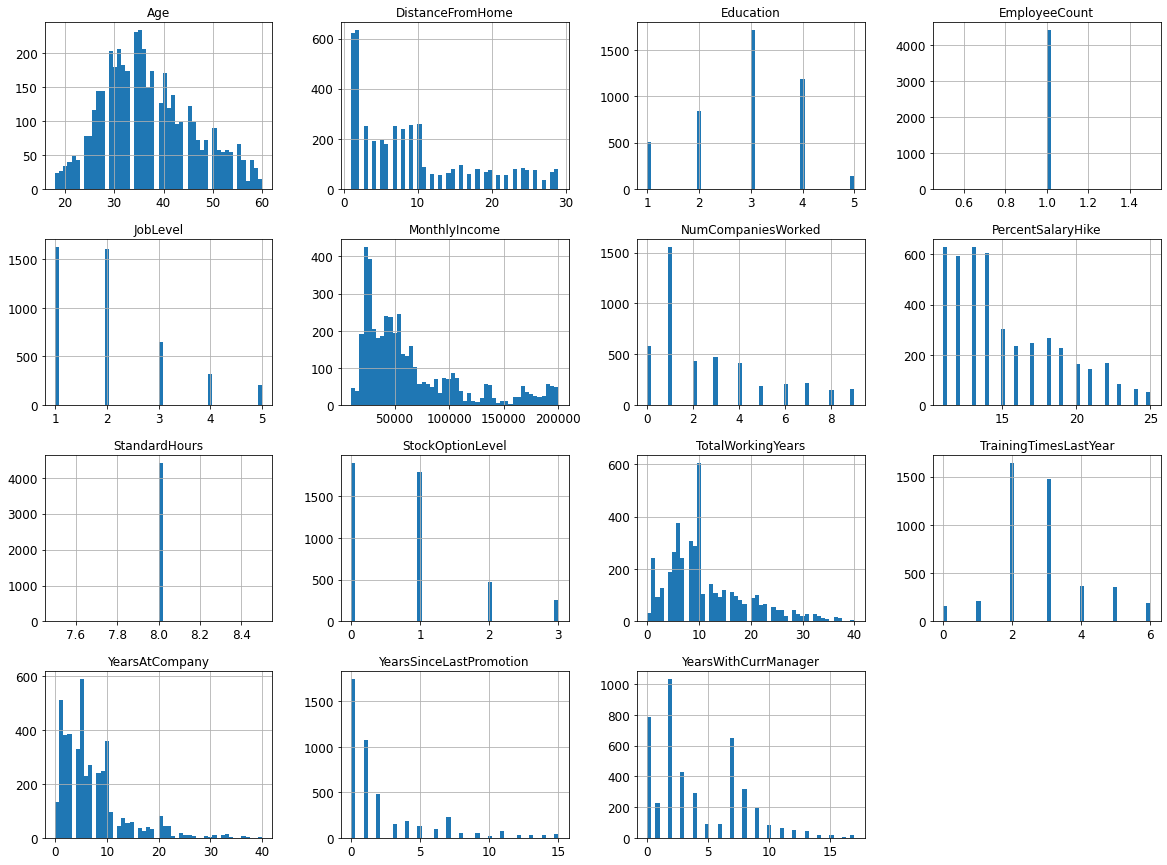

In [8]:
general.hist(bins=50, figsize=(20,15))
plt.show()

### Data preparation

Remarks regarding the data set:
- Normalization is not needed because everything seems to be at an uniform scale.
- The gender field may be discarded for ethical reasons.
- The presence of the "NA" value forces the field type to be "float64", according to the "IEEE 754" standard.

In [19]:
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import LabelBinarizer

# Dropping the gender and "over 18" fields
general = general.drop(columns=["Gender", "Over18"])

# Converting boolean to binary (0 or 1)
general.replace({'No': 0, 'Yes':1}, inplace=True)

# Encoding ordinal fields
ordinal_encoder = OrdinalEncoder()
general["BusinessTravel"] = ordinal_encoder.fit_transform(general[["BusinessTravel"]])

# Encoding non-ordinal fields
labelbinarizer_encoder = LabelBinarizer()
general_department = pd.DataFrame(labelbinarizer_encoder.fit_transform(general["Department"]))
general_department.rename(columns=dict(zip(general_department.columns, ("Department " + sub for sub in general["Department"].unique()))), inplace=True)
general_education = pd.DataFrame(labelbinarizer_encoder.fit_transform(general["EducationField"]))
general_education.rename(columns=dict(zip(general_education.columns, ("EducationField " + sub for sub in general["EducationField"].unique()))), inplace=True)
general_role = pd.DataFrame(labelbinarizer_encoder.fit_transform(general["JobRole"]))
general_role.rename(columns=dict(zip(general_role.columns, ("JobRole " + sub for sub in general["JobRole"].unique()))), inplace=True)
general_martial = pd.DataFrame(labelbinarizer_encoder.fit_transform(general["MaritalStatus"]))
general_martial.rename(columns=dict(zip(general_martial.columns, ("MaritalStatus " + sub for sub in general["MaritalStatus"].unique()))), inplace=True)

# Combining all the prepared data
general = pd.concat([general, general_department, general_education, general_role, general_martial], axis=1).drop(["Department", "EducationField", "JobRole", "MaritalStatus"], axis=1)

general.head()

,Age,Attrition,BusinessTravel,DistanceFromHome,Education,EmployeeCount,EmployeeID,Gender,JobLevel,MonthlyIncome,...,JobRole Sales Executive,JobRole Human Resources,JobRole Research Director,JobRole Laboratory Technician,JobRole Manufacturing Director,JobRole Sales Representative,JobRole Manager,MaritalStatus Married,MaritalStatus Single,MaritalStatus Divorced
0,51,0,2.0,6,2,1,1,Female,1,131160,...,0,0,0,0,0,0,0,0,1,0
1,31,1,1.0,10,1,1,2,Female,1,41890,...,0,0,0,0,1,0,0,0,0,1
2,32,0,1.0,17,4,1,3,Male,4,193280,...,0,0,0,0,0,1,0,0,1,0
3,38,0,0.0,2,5,1,4,Male,3,83210,...,0,0,0,0,0,0,0,0,1,0
4,32,0,2.0,10,1,1,5,Male,1,23420,...,0,0,0,0,0,1,0,0,0,1


Then we can combine all our data sets together using <code>merge()</code>.

In [20]:
dataset = general.merge(manager_survey, how="left", on="EmployeeID").merge(employee_survey, how="left", on="EmployeeID")

Finally, we can apply our final treatment on the data set.

In [21]:
# Dropping nulls
dataset.dropna(inplace=True)

### Data split

Now that our data set is fully loaded and prepared, we have to split and shuffle it to reserve a sample for our learning algorithm.

In [44]:
from sklearn.model_selection import StratifiedShuffleSplit

# Creating the shuffle splitter object
split = StratifiedShuffleSplit(n_splits=1, test_size=0.25, random_state=69)

# Performing the shuffle split
for train_index, test_index in split.split(dataset, dataset["Attrition"]):
    data_train_set = dataset.loc[train_index]
    data_test_set = dataset.loc[test_index]

data_train_label = data_train_set["Attrition"].copy()
data_train_set.drop("Attrition", axis=1, inplace=True)

KeyError: "Passing list-likes to .loc or [] with any missing labels is no longer supported. The following labels were missing: Int64Index([ 799, 1077, 1848,   23, 1909,\n            ...\n             111, 3261,  476, 2696,  210],\n           dtype='int64', length=78). See https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#deprecate-loc-reindex-listlike"

### Model training

The next step is the training of a learning algorithm.

In [22]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(data_train_set, data_train_label)

ValueError: could not convert string to float: 'Travel_Rarely'